In [1]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from pathlib import Path
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Input,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [2]:
# Path ke dataset
dataset_dir = "C:/Users/ASUS/computervision/Tensorflow/Dataset"

# Preprocessing dan augmentasi (bisa diatur sesuai kebutuhan)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data untuk validasi
)

# Load data training
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load data validasi
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 7200 images belonging to 3 classes.
Found 1800 images belonging to 3 classes.


In [3]:
from pathlib import Path

# Path ke dataset
image_dir = Path("C:/Users/ASUS/computervision/Tensorflow/Dataset")

# Ambil semua file gambar dari subfolder
filepaths = []
labels = []

for folder in image_dir.iterdir():
    if folder.is_dir():
        for img_file in folder.iterdir():
            if img_file.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                filepaths.append(str(img_file))
                labels.append(folder.name)

# Masukkan ke dalam DataFrame
data = pd.DataFrame({
    "filepath": filepaths,
    "label": labels
})

data.head()


,filepath,label
0,C:\Users\ASUS\computervision\Tensorflow\Datase...,Boot
1,C:\Users\ASUS\computervision\Tensorflow\Datase...,Boot
2,C:\Users\ASUS\computervision\Tensorflow\Datase...,Boot
3,C:\Users\ASUS\computervision\Tensorflow\Datase...,Boot
4,C:\Users\ASUS\computervision\Tensorflow\Datase...,Boot


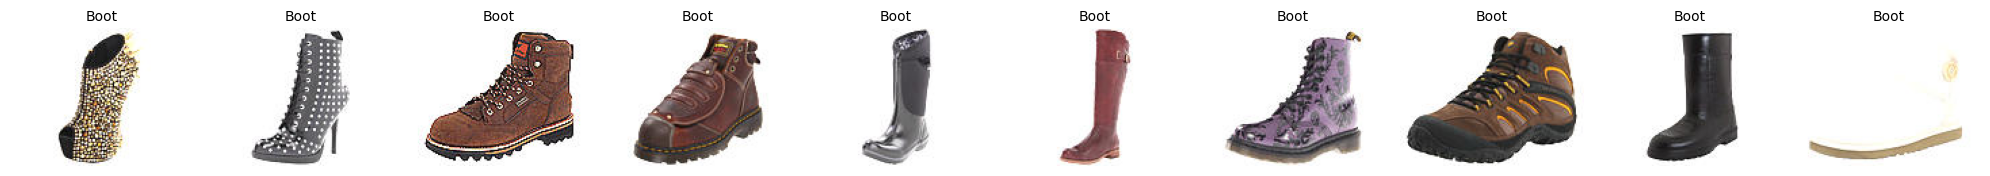

In [4]:
import os
import random

# Ganti dengan nama kelas yang ingin Anda tampilkan
class_name = 'Boot'
folder_path = f"C:/Users/ASUS/computervision/Tensorflow/Dataset/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


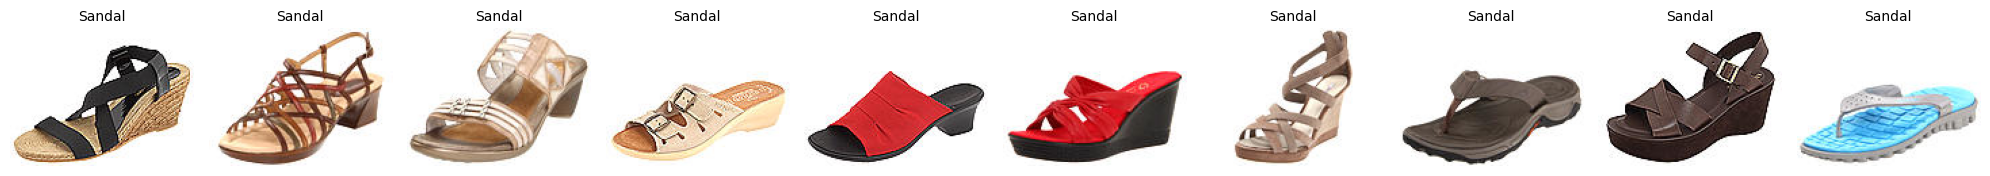

In [5]:
import os
import random

# Ganti dengan nama kelas yang ingin Anda tampilkan
class_name = 'Sandal'
folder_path = f"C:/Users/ASUS/computervision/Tensorflow/Dataset/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


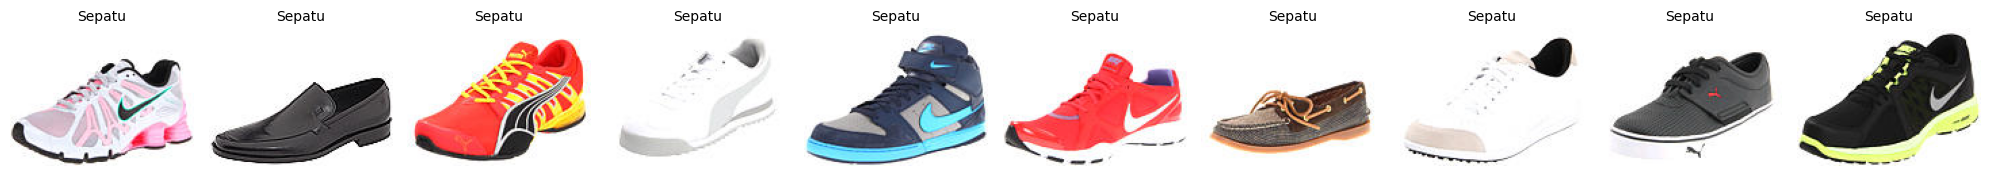

In [6]:
import os
import random

# Ganti dengan nama kelas yang ingin Anda tampilkan
class_name = 'Sepatu'
folder_path = f"C:/Users/ASUS/computervision/Tensorflow/Dataset/{class_name}"

# Ambil 10 file gambar secara acak
file_list = os.listdir(folder_path)
sample_files = random.sample(file_list, 10)

# Plot gambar
plt.figure(figsize=(20, 4))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(folder_path, filename)
    image = imread(img_path)

    plt.subplot(1, 10, i+1)
    plt.imshow(image)
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Ambil label
labels = data['label']

# Split 80% train, 20% test+val
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state=42)

# Dari 20% sisanya, split lagi 50-50 menjadi test dan validation (10% + 10%)
label_temp = X_temp['label']
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_temp, random_state=42)

# Tampilkan hasil
print('The shape of train data:', X_train.shape)
print('The shape of test data:', X_test.shape)
print('The shape of validation data:', X_val.shape)

The shape of train data: (7200, 2)
The shape of test data: (900, 2)
The shape of validation data: (900, 2)


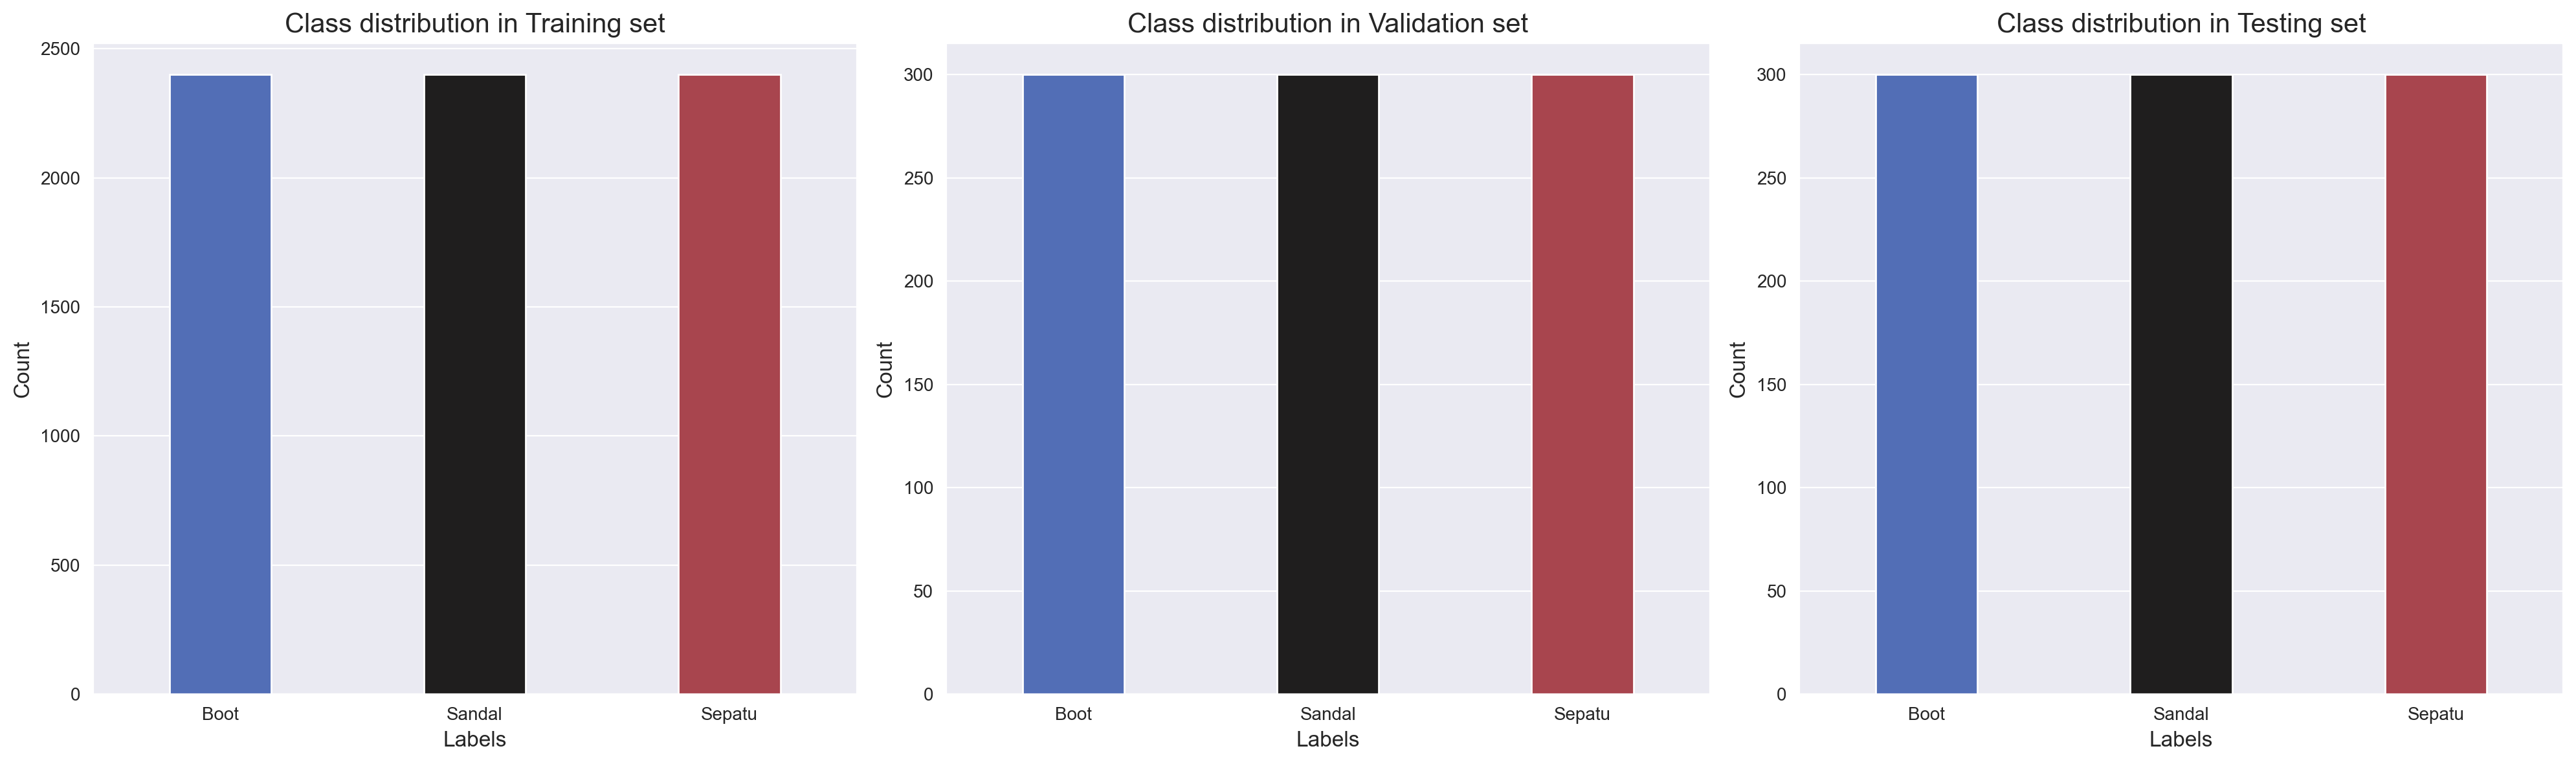

In [8]:
# Sesuaikan label sesuai dengan dataset Anda
labels = ['Boot', 'Sandal', 'Sepatu']

# Hitung jumlah label di setiap subset
label1, count1 = np.unique(X_train['label'], return_counts=True)
label2, count2 = np.unique(X_val['label'], return_counts=True)
label3, count3 = np.unique(X_test['label'], return_counts=True)

# Pastikan urutan sesuai dengan labels
count_dict1 = dict(zip(label1, count1))
count_dict2 = dict(zip(label2, count2))
count_dict3 = dict(zip(label3, count3))

uni1 = pd.DataFrame({'Count1': [count_dict1.get(l, 0) for l in labels]}, index=labels)
uni2 = pd.DataFrame({'Count2': [count_dict2.get(l, 0) for l in labels]}, index=labels)
uni3 = pd.DataFrame({'Count3': [count_dict3.get(l, 0) for l in labels]}, index=labels)

# Visualisasi
plt.figure(figsize=(20, 6), dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1.reset_index(), x='index', y='Count1', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Training set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2.reset_index(), x='index', y='Count2', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Validation set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(133)
sns.barplot(data=uni3.reset_index(), x='index', y='Count3', hue='index', palette='icefire', legend=False, width=0.4)\
    .set_title('Class distribution in Testing set', fontsize=15)
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
from random import seed, random
# Setup
dataset_home = 'dataset_training/'  # direktori output
subdirs = ['train/', 'test/']
labeldirs = ['Boot/', 'Sandal/', 'Sepatu/']

# Buat struktur direktori
for subdir in subdirs:
    for labeldir in labeldirs:
        newdir = os.path.join(dataset_home, subdir, labeldir)
        makedirs(newdir, exist_ok=True)

# Set seed agar hasil acak
seed(1)

# Rasio data validasi (test)
val_ratio = 0.2

# Direktori sumber dataset
src_base = 'C:/Users/ASUS/computervision/Tensorflow/Dataset/'  

# Proses copy
for label in labeldirs:
    folder = os.path.join(src_base, label.strip('/'))  
    for file in listdir(folder):
        src = os.path.join(folder, file)
        dst_dir = 'train/' if random() >= val_ratio else 'test/'
        dst = os.path.join(dataset_home, dst_dir, label, file)
        copyfile(src, dst)

In [11]:
# Cek isi direktori
for split in ['train', 'test']:
    for label in ['Boot', 'Sandal', 'Sepatu']:
        path = os.path.join(dataset_home, split, label)
        print(f"Jumlah gambar '{label}' di {split}: {len(os.listdir(path))}")


Jumlah gambar 'Boot' di train: 2403
Jumlah gambar 'Sandal' di train: 2402
Jumlah gambar 'Sepatu' di train: 2369
Jumlah gambar 'Boot' di test: 597
Jumlah gambar 'Sandal' di test: 598
Jumlah gambar 'Sepatu' di test: 631


In [12]:
# parameters
image_size = 64
image_channel = 3
bat_size = 16

# Creating image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)

# Path ke folder utama dataset
base_path = "C:/Users/ASUS/computervision/Tensorflow/Dataset"

In [13]:
# Train
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical'
)

# Validation
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical',
    shuffle=False
)

# Test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    directory=base_path,
    x_col='filepath',
    y_col='label',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='categorical',
    shuffle=False
)


Found 7200 validated image filenames belonging to 3 classes.
Found 900 validated image filenames belonging to 3 classes.
Found 900 validated image filenames belonging to 3 classes.


In [14]:
train_gen = train_datagen.flow_from_directory(
    directory = r'C:\Users\ASUS\computervision\Tensorflow\dataset_training\train',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=bat_size
)

val_gen = test_datagen.flow_from_directory(
    directory = r'C:\Users\ASUS\computervision\Tensorflow\dataset_training\test',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=bat_size,
    shuffle=False
)


Found 7174 images belonging to 3 classes.
Found 1826 images belonging to 3 classes.


In [15]:
# Model
model = Sequential()

# Input layer (menggunakan Input() untuk menghindari warning)
model.add(Input(shape=(image_size, image_size, image_channel)))

# Block 0 - Input + Conv
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer - untuk 3 kelas (Boot, Sandal, Shoe)
model.add(Dense(3, activation='softmax'))

# Ringkasan
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 918,723 (3.50 MB)

 Trainable params: 916,739 (3.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=3,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',
                              patience= 5,
                              restore_best_weights=True,
                              verbose=0)

In [17]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
boot_sandal_shoe = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[learning_rate_reduction, early_stoping]
)

C:\Users\ASUS\anaconda3\envs\Tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 167s 362ms/step - accuracy: 0.6435 - loss: 0.9734 - val_accuracy: 0.7481 - val_loss: 0.6216 - learning_rate: 0.0010
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 124ms/step - accuracy: 0.7677 - loss: 0.5847 - val_accuracy: 0.7908 - val_loss: 0.6164 - learning_rate: 0.0010
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 131ms/step - accuracy: 0.8235 - loss: 0.4599 - val_accuracy: 0.9195 - val_loss: 0.2186 - learning_rate: 0.0010
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.8599 - loss: 0.3769 - val_accuracy: 0.9299 - val_loss: 0.1855 - learning_rate: 0.0010
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - accuracy: 0.8642 - loss: 0.3546 - val_accuracy: 0.8664 - val_loss: 0.3698 - learning_rate: 0.0010
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.8796 - loss: 0.3193 - val_accuracy: 0.8680 - val_loss: 0.3481 - learning_rate: 0.0010
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 131ms/step - accuracy: 0.

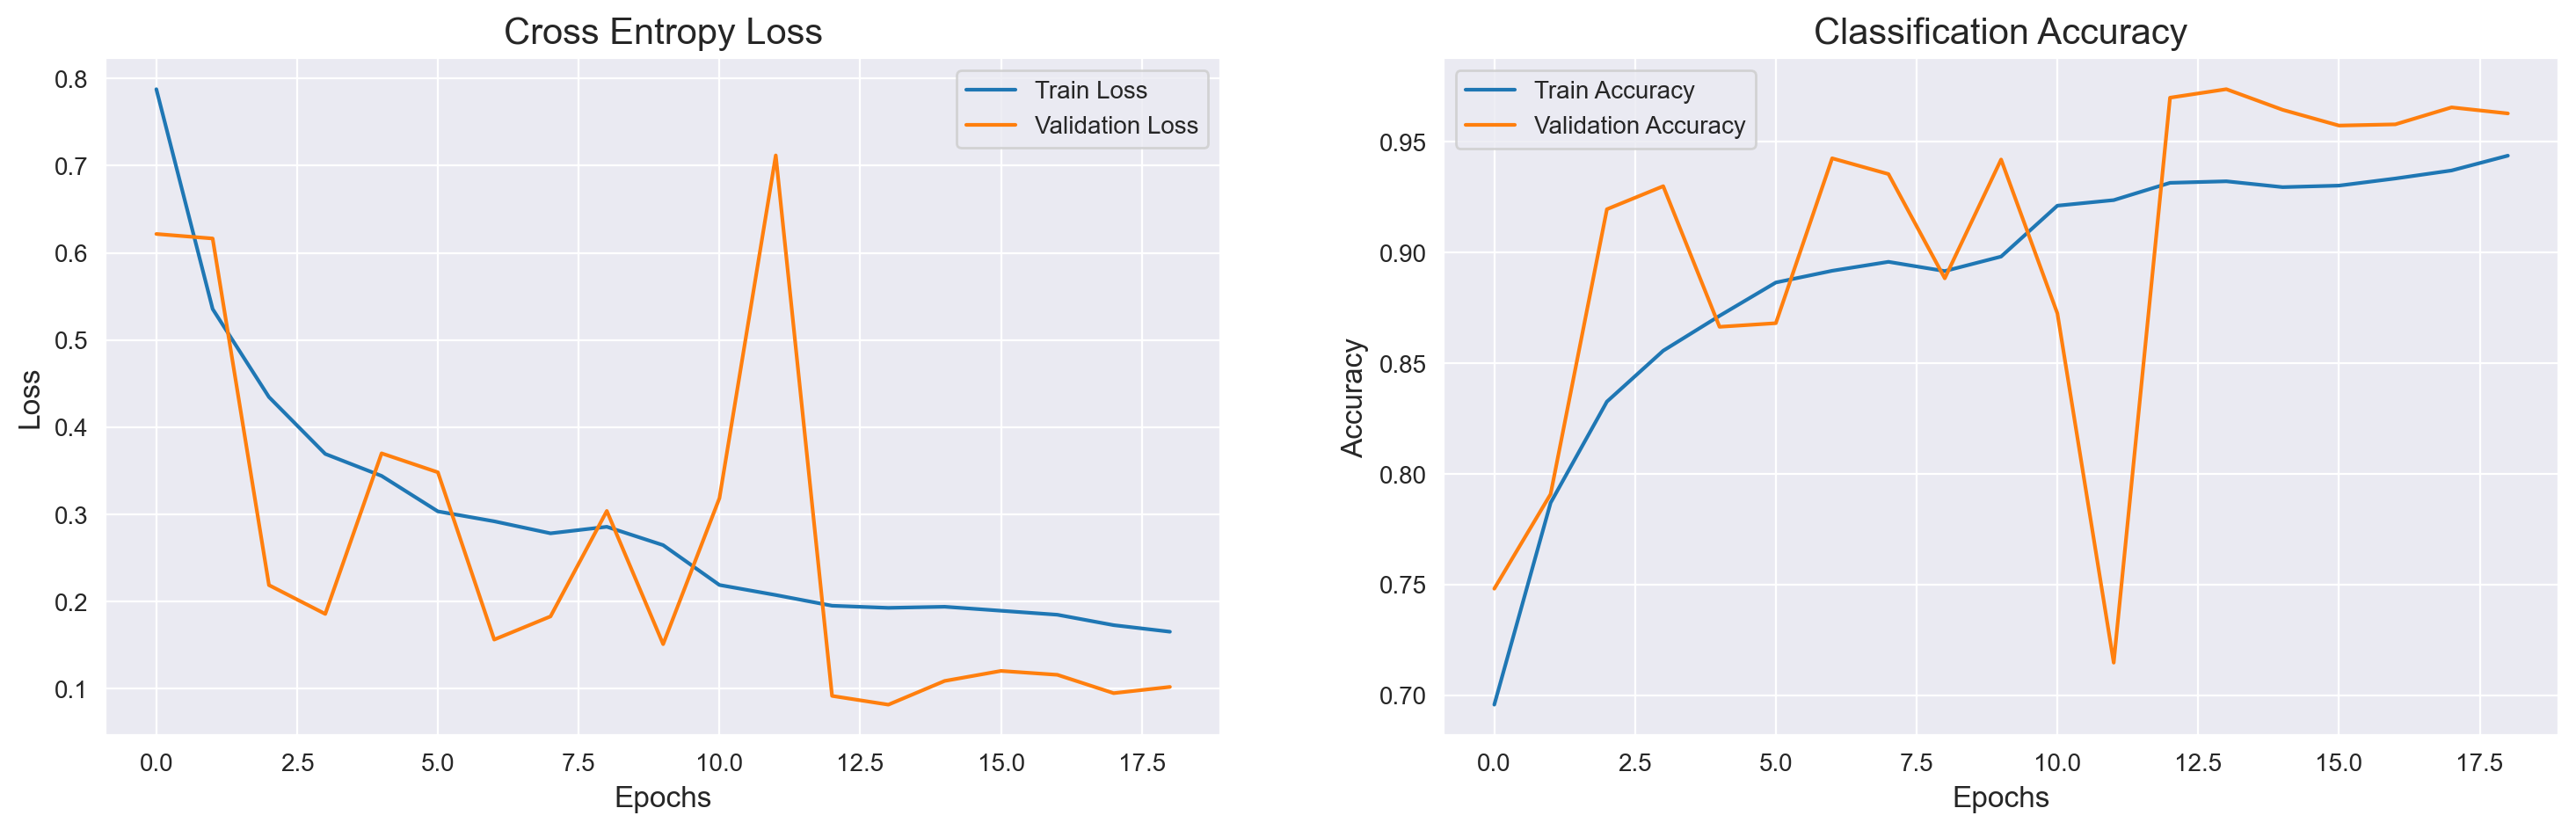

In [19]:
error = pd.DataFrame(boot_sandal_shoe.history)

plt.figure(figsize=(18,5), dpi=200)
sns.set_style('darkgrid')

# Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Train Loss')
plt.plot(error['val_loss'], label='Validation Loss')
plt.legend()

# Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label='Train Accuracy')
plt.plot(error['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()


In [20]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('Accuracy model untuk data training adalah:',acc*100)
print('Loss model untuk data pelatihan adalah:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('Accuracy model untuk data validasi adalah:',acc*100)
print('Loss model untuk data validasi adalah:',loss)

Accuracy model untuk data training adalah: 96.24999761581421
Loss model untuk data pelatihan adalah: 0.11126209795475006
Accuracy model untuk data validasi adalah: 97.44444489479065
Loss model untuk data validasi adalah: 0.0814552754163742


In [21]:
# Save Model
model.save("model.h5")

In [22]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('Accuracy model untuk testing data adalah:',acc*100)
print('Loss model untuk testing data adalah:',loss)

Accuracy model untuk testing data adalah: 97.55555391311646
Loss model untuk testing data adalah: 0.07006648927927017


In [23]:
labels =['Boot','Sandal','Sepatu']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

        Boot       0.99      0.97      0.98       300
      Sandal       0.99      0.96      0.97       300
      Sepatu       0.95      0.99      0.97       300

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



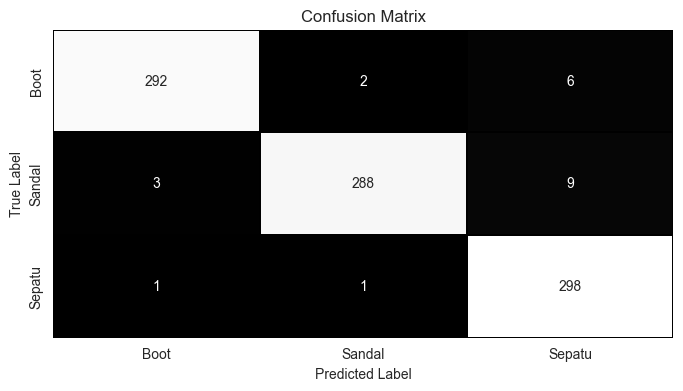

In [24]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (8,4),dpi=100)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

In [29]:
# Parameter
size = (64, 64)
bat_size = 16

# Path ke folder test (lokal)
test_dir = "C:/Users/ASUS/computervision/Tensorflow/dataset_test/"
filenames = os.listdir(test_dir)

# Buat DataFrame untuk test
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'  # placeholder, tidak digunakan dalam prediksi

# Data generator untuk test
test_datagen = ImageDataGenerator(rescale=1./255)

test1_idg = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=test_dir,
    x_col="filename",
    y_col="label",  # dummy, ignored in inference
    batch_size=bat_size,
    target_size=size,
    class_mode=None,
    shuffle=False
)

# Prediksi
test1_predict = model.predict(test1_idg, verbose=1)
test1_predict_argmax = np.argmax(test1_predict, axis=1)

# Tambahkan label prediksi ke DataFrame
test_data['label'] = test1_predict_argmax

# Mapping ke label string
label_mapping = {0: 'Boot', 1: 'Sandal', 2: 'Sepatu'}
test_data['label'] = test_data['label'].map(label_mapping)

# Tampilkan hasil prediksi
print(test_data.head())

# Simpan ke CSV
test_data.to_csv("hasil_prediksi.csv", index=False)

Found 20 validated image filenames.
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

C:\Users\ASUS\anaconda3\envs\Tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
          filename label
0     boot (1).jpg  Boot
1  boot (2990).jpg  Boot
2  boot (2991).jpg  Boot
3  boot (2992).jpg  Boot
4  boot (2993).jpg  Boot


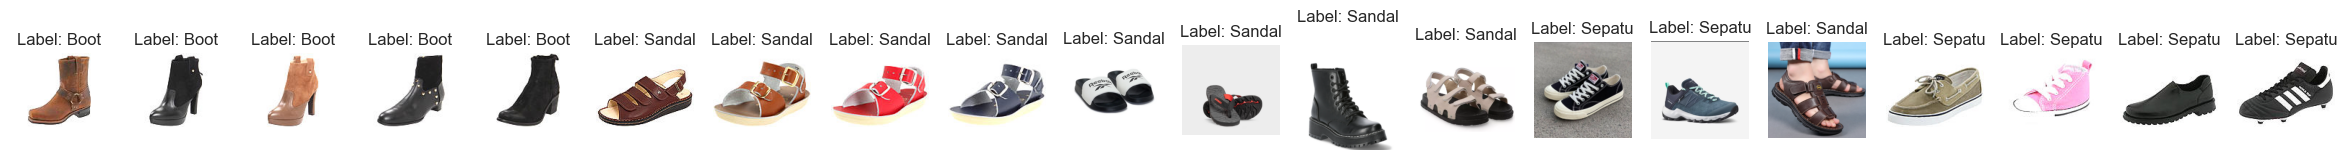

In [31]:
fig, axes = plt.subplots(1, 20, figsize=(30, 4))
for idx in range(20):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()